## CNN MNIST

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 7

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time
plt.style.use('classic')
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## CNN architecture 1 with kernel size 2 + 4 Convolution layer + 3 Max Pooling layer

#### BottleNeck layer is included to reduce computational cost

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))

model.add(Conv2D(16, (1, 1), activation='relu')) #Bottle-Neck layer to reduce computation cost

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (1, 1), activation='relu')) # Bottle-Neck layer
model.add(Conv2D(96, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (1, 1), activation='relu')) #Bottle-Neck layer
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 27, 27, 16)        528       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 64)        4160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 16)        1040      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 96)        6240      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 96)          0         
__________

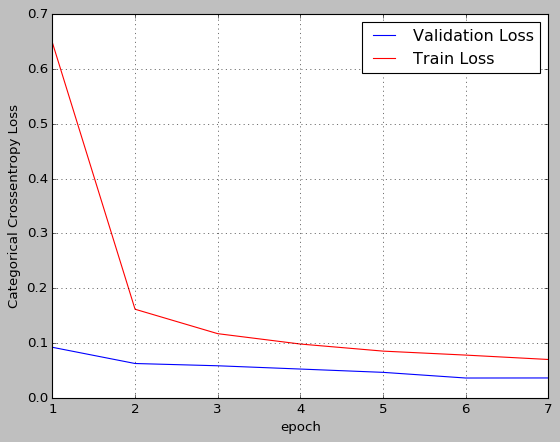

In [6]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## CNN architecture 2 with kernel size 3 + 3 Convolution layer + 1 Max Pooling layer

#### BottleNeck layer is included to reduce computational cost

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (1, 1), activation='relu')) #Bottle-Neck layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(16, (1, 1), activation='relu')) #Bottle-Neck layer

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history= model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 16)        528       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        9280      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1040      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 128)       18560     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 11, 128)       0         
__________

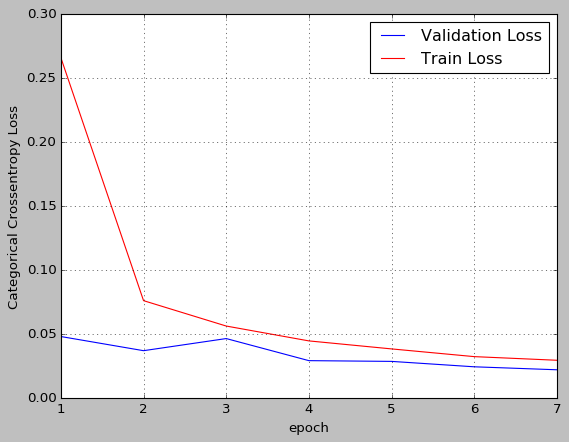

In [8]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## CNN architecture 1 with kernel size 3 + 6 Convolution layer + 2 Max Pooling layer

#### BottleNeck layer is included to reduce computational cost

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(Conv2D(16, (1, 1), activation='relu')) #Bottle-Neck layer
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(Conv2D(16, (1, 1), activation='relu')) #Bottle-Neck layer
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (1, 1), activation='relu')) #Bottle-Neck layer
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Conv2D(16, (1, 1), activation='relu')) #Bottle-Neck layer
model.add(Conv2D(160, (3, 3), activation='relu'))


model.add(Conv2D(16, (1, 1), activation='relu')) #Bottle-Neck layer
model.add(Conv2D(192, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history= model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 26, 26, 16)        528       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 64)        9280      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 16)        1040      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 22, 22, 96)        13920     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 96)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 11, 11, 16)        1552      
__________

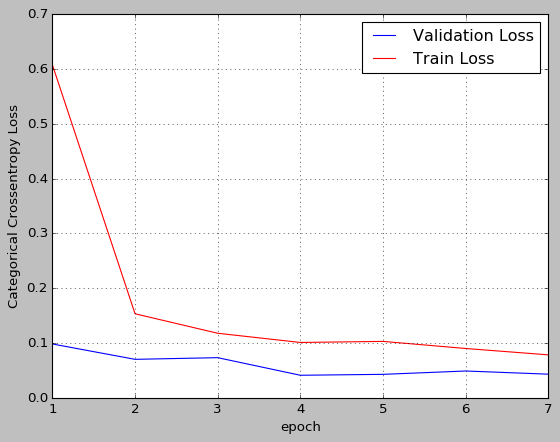

In [14]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [15]:
#code copied from -http://zetcode.com/python/prettytable/
from prettytable import PrettyTable   
x = PrettyTable()
x.field_names = ["No. of Convolution layer", "No. of Max Pool layer", "Kernel Size", "Accuracy"]
x.add_row([4,3,2,0.9895])
x.add_row([3,1,3,0.9926])
x.add_row([6,2,3,0.9868])

print(x)

+--------------------------+-----------------------+-------------+----------+
| No. of Convolution layer | No. of Max Pool layer | Kernel Size | Accuracy |
+--------------------------+-----------------------+-------------+----------+
|            4             |           3           |      2      |  0.9895  |
|            3             |           1           |      3      |  0.9926  |
|            6             |           2           |      3      |  0.9868  |
+--------------------------+-----------------------+-------------+----------+
